##### Análise comparativa entre:

  * MFS_ESC - MFS® Meridian European Smlr Coms A1 EUR - LU0125944966
  * AlkenESC - Alken Small Cap Europe R - LU0332193779

In [42]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.plotly as py
import plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib.ticker import FuncFormatter
from pandas_datareader import data as pdr
from time import gmtime, strftime
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)
pd.set_option("display.max_rows", 20)

# Set matplotlib style
plt.style.use('seaborn')

# Set plotly offline
init_notebook_mode(connected=True)

In [43]:
a = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('A última vez que este script foi executado foi em:', a)

A última vez que este script foi executado foi em: 2017-10-12 14:16:47


In [44]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
a = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('A última vez que este script foi executado foi em:', a)

A última vez que este script foi executado foi em: 2017-10-12 14:16:47


In [46]:
#### Functions ####
def compute_drawdowns(dataframe):
    """
    Function to compute drawdowns of a timeseries
    """
    return (dataframe / dataframe.cummax() -1) * 100

In [47]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2007-06-10'

MSid = ['F000000RDD', 'F0GBR04UGX']
Nomes = ['AlkenSCE','MFS_ESC']
fundos = pd.DataFrame()

# Conversão de datetime
conv = time.strptime(Begin,"%Y-%m-%d") 
start_date = time.strftime("%m/%d/%Y",conv)

# Download
for ticker in MSid:
    url = "https://lt.morningstar.com/api/rest.svc/timeseries_price/okhysb8aoh?id=" + str(ticker) + "&currencyId=BAS&idtype=Morningstar&frequency=daily&startDate=" + start_date + "&outputType=CSV"
    fundo = pd.read_csv(url, sep = ";" , index_col = 'date', parse_dates = True)
    fundo =  fundo.drop('Unnamed: 2', 1)
    fundos = fundos.merge(fundo, left_index = True, right_index = True, how='outer')
    
fundos.columns = Nomes
fundos = fundos.fillna(method='ffill')

In [48]:
#### Returns ####
returns = (fundos / fundos.shift(1)) - 1

In [49]:
#### Normalization to 100 ####
fundos_norm = round((fundos / fundos.iloc[0] * 100), 2)

In [50]:
fundos_norm.iplot(kind='scatter',yTitle='Valor por cada 100€ investidos', title='Performance dos fundos')

In [51]:
#### Computing Drawdowns ####
DD = round(compute_drawdowns(fundos_norm), 2)

DD.iplot(kind='scatter', title='Drawdown dos fundos', yTitle='Percentagem')

In [52]:
#### Returns ####
returns = (fundos_norm / fundos_norm.shift(1)) - 1

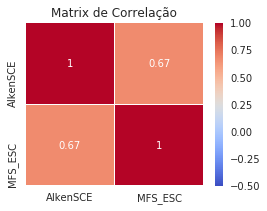

In [53]:
##### Correlation (bonus: Seaborn heatmap)####
Pcorr_matrix = returns.corr()

# Normal heatmap
fig, ax = plt.subplots()
fig.set_size_inches(4, 3) # 68%
sns.heatmap(Pcorr_matrix, annot = True, cmap = "coolwarm", linewidths=.2, vmin = -0.5)
plt.title('Matrix de Correlação')
plt.show()

In [54]:
# Resampling to yearly (business year)
yearly_quotes = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes = pd.concat([fundos_norm.iloc[:1], yearly_quotes])

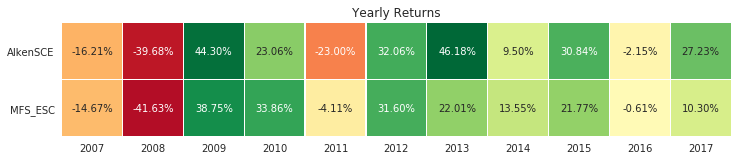

In [64]:
# Returns
yearly_returns = ((yearly_quotes / yearly_quotes.shift(1)) - 1) * 100
returns = yearly_returns.set_index([list(range((int(Begin[:4]) - 1), 2018))]).drop(int(Begin[:4]) - 1)

#### Inverter o sentido das rows no dataframe ####
returns = returns.transpose()

# Yearly returns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(12, 2.1) # 68%
heatmap = sns.heatmap(returns, annot=True, cmap="RdYlGn", linewidths=.2, fmt=".2f", cbar=False, center=1)
for t in heatmap.texts: t.set_text(t.get_text() + "%")
plt.title('Yearly Returns')
plt.yticks(rotation=360)
plt.show()

In [65]:
#### Ratio ####
ratio = fundos_norm.index
ratio = fundos_norm.iloc[:,0] / fundos_norm.iloc[:,1]
ratio.iplot(kind='scatter', title='Rácio entre os fundos')

In [66]:
#### Median ####
ratio.median()

0.9655714494242558

In [67]:
ratio.tail(10)

date
2017-09-28    1.094044
2017-09-29    1.097218
2017-10-02    1.096058
2017-10-03    1.098026
2017-10-04    1.099216
2017-10-05    1.094291
2017-10-06    1.094006
2017-10-09    1.101689
2017-10-10    1.101921
2017-10-11    1.102219
dtype: float64